# Trabalho de Inteligência Artificial

*   Autor: Fernando Azevedo Peres
*   Periodo: 2022/1

## Definição do Dataset

*   Dataset: Wine

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import load_wine

dataset = load_wine(as_frame=True)

dataframe = pd.DataFrame(dataset['data'])
X = dataframe
dataframe['target'] = dataset['target']
y = dataframe['target']

dataframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## Análise do Dataset

In [ ]:
dist = dataframe['target'].value_counts(normalize=True)

print(f"Classe 0: {dist[0]*100 : .2f} %")
print(f"Classe 1: {dist[1]*100 : .2f} %")
print(f"Classe 2: {dist[2]*100 : .2f} %")

Classe 0:  33.15 %
Classe 1:  39.89 %
Classe 2:  26.97 %


In [ ]:
dataframe.loc[:, 'alcohol':'proline'].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Preprocessamento dos Dados

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def preprocessing(estimator):
  scalar = StandardScaler()
  return Pipeline([('transformer', scalar), ('estimator', estimator)])


# Importando o dataset novamente pois algo no dataframe do pandas estava interfirindo com o classificador.
z_dataset = load_wine()
z_X = z_dataset.data
z_y = z_dataset.target

## Etapa 1


### ZeroR

In [ ]:
from sklearn.dummy import DummyClassifier


rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)


zR = DummyClassifier()
pipeline_zR = preprocessing(zR)


scores_zR = cross_val_score(pipeline_zR, z_X, z_y, scoring='accuracy', cv=rkf)

print(scores_zR)

mean_zR = scores_zR.mean()
std_zR = scores_zR.std()
inf_zR, sup_zR = stats.norm.interval(0.95, loc=mean_zR, scale=std_zR/np.sqrt(len(scores_zR)))

zR_results = ['ZR', mean_zR, std_zR, inf_zR, sup_zR]

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean_zR, std_zR))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf_zR, sup_zR))

[0.38888889 0.38888889 0.38888889 0.38888889 0.38888889 0.38888889
 0.38888889 0.38888889 0.41176471 0.47058824 0.38888889 0.38888889
 0.38888889 0.38888889 0.38888889 0.38888889 0.38888889 0.38888889
 0.41176471 0.47058824 0.38888889 0.38888889 0.38888889 0.38888889
 0.38888889 0.38888889 0.38888889 0.38888889 0.41176471 0.47058824]

Mean Accuracy: 0.40 Standard Deviation: 0.02
Accuracy Confidence Interval (95%): (0.39, 0.41)



### Naive Bayes Gaussiano

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine


rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)


gNB = GaussianNB()
pipeline_gNB = preprocessing(gNB)


scores_gNB = cross_val_score(pipeline_gNB, z_X, z_y, scoring='accuracy', cv = rkf)

print (scores_gNB)

mean_gNB = scores_gNB.mean()
std_gNB = scores_gNB.std()
inf_gNB, sup_gNB = stats.norm.interval(0.95, loc=mean_gNB, scale=std_gNB/np.sqrt(len(scores_gNB)))

gNB_results = ['NBG', mean_gNB, std_gNB, inf_gNB, sup_gNB]

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean_gNB, std_gNB))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf_gNB, sup_gNB)) 

[1.         1.         1.         1.         0.88888889 1.
 1.         1.         1.         0.88235294 1.         1.
 1.         1.         1.         0.83333333 1.         1.
 1.         0.88235294 1.         1.         1.         0.94444444
 1.         0.94444444 1.         0.94444444 0.88235294 1.        ]

Mean Accuracy: 0.97 Standard Deviation: 0.05
Accuracy Confidence Interval (95%): (0.96, 0.99)



## Etapa 2


In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search(pipeline, params, cv=4):
  return GridSearchCV(estimator=pipeline, param_grid = params, scoring='accuracy', cv = cv)

### K Vizinhos Mais Próximos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


params_kNN={'estimator__n_neighbors': [1, 3, 5, 7]}
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)


kNN = KNeighborsClassifier()
pipeline_kNN = preprocessing(kNN)


gs_kNN = grid_search(pipeline_kNN, params_kNN)


scores_kNN = cross_val_score(gs_kNN, z_X, z_y, scoring='accuracy', cv=rkf)

print(scores_kNN)

mean_kNN = scores_kNN.mean()
std_kNN = scores_kNN.std()
inf_kNN, sup_kNN = stats.norm.interval(0.95, loc=mean_kNN, scale=std_kNN/np.sqrt(len(scores_kNN)))

kNN_results = ['KNN', mean_kNN, std_kNN, inf_kNN, sup_kNN]

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean_kNN, std_kNN))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf_kNN, sup_kNN))

[1.         1.         1.         0.94444444 0.94444444 0.94444444
 1.         0.94444444 1.         0.82352941 0.94444444 0.94444444
 1.         1.         1.         0.77777778 1.         1.
 1.         0.88235294 0.94444444 0.94444444 0.94444444 0.94444444
 1.         1.         1.         0.94444444 0.94117647 1.        ]

Mean Accuracy: 0.96 Standard Deviation: 0.05
Accuracy Confidence Interval (95%): (0.94, 0.98)



### Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine


params_dT={'estimator__max_depth': [None, 3, 5, 10]}
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)


dT = DecisionTreeClassifier()
pipeline_dT = preprocessing(dT)


gs_dT = grid_search(pipeline_dT, params_dT)


scores_dT = cross_val_score(gs_dT, z_X, z_y, scoring='accuracy', cv = rkf)

print (scores_dT)

mean_dT = scores_dT.mean()
std_dT = scores_dT.std()
inf_dT, sup_dT = stats.norm.interval(0.95, loc=mean_dT, scale=std_dT/np.sqrt(len(scores_dT)))

dT_results = ['AD', mean_dT, std_dT, inf_dT, sup_dT]

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean_dT, std_dT))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf_dT, sup_dT)) 

[0.88888889 1.         0.83333333 0.88888889 0.77777778 0.83333333
 0.94444444 0.88888889 1.         0.76470588 0.94444444 0.94444444
 0.88888889 0.94444444 0.94444444 0.66666667 0.94444444 0.77777778
 1.         0.88235294 0.94444444 0.83333333 0.88888889 0.94444444
 0.88888889 0.83333333 0.94444444 0.83333333 0.88235294 1.        ]

Mean Accuracy: 0.89 Standard Deviation: 0.08
Accuracy Confidence Interval (95%): (0.86, 0.92)



### KMeans Centroides

In [ ]:
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator
from sklearn.datasets import load_wine


class KMC(BaseEstimator):
    def __init__(self, K=1):
        super().__init__()
        self.K = K
    
    def fit(self, x_train, y_train):
        # Conta a quantidade de classes unicas.
        self.classes = {}
        self.nClasses = np.unique(y_train)
        # Separa os testes em grupos por classe, e cria um estimador KMeans com k clusters para cada grupo.
        for i in self.nClasses:
          self.classes[i] = {'X':[x_train[j] for j, value in enumerate(y_train) if y_train[j] == i],
                             'Y':[y_train[j] for j, value in enumerate(y_train) if y_train[j] == i]}
          self.classes[i]['estimator'] = KMeans(n_clusters=self.K).fit(self.classes[i]['X'])


    def predict(self, x_test):
        cluster = []

        # Irá executar para cada classe.
        for i in range(len(self.nClasses)):
          cluster.append([])
          # Pega as predições de cada classe para a entrada de teste.
          prediction = self.classes[i]['estimator'].predict(x_test)
          for j, value in enumerate(prediction):
            # Pega a predição de cada KMeans e relaciona com a classe do target, alem de armazenar as cordenadas do centroide.
            cluster[i].append({'belong_to_class': i, 'n_cluster': value, 'center':self.classes[i]['estimator'].cluster_centers_[value]})

        prediction = []
        # Irá executar para cada teste.
        for i in range(len(x_test)):
          menor = np.Inf
          index = 0
          # Todas as classes tem uma predição para a mesma entrada de teste.
          # Logo, precisamos decidir qual delas esta correta.
          # Compara a "posição" da entrada de teste com a "posição" de cada centroide (do cluster que cada classe previu como resultado).
          for j in range(len(self.nClasses)):
            dist = distance.euclidean(x_test[i], cluster[j][i]['center'])
            if dist < menor:
              menor = dist
              index = j
          # Ao finalizar os testes com a predição de cada classe, pega a menor distancia e atribui ao resultado para aquela entrada.
          prediction.append(cluster[index][i]['belong_to_class'])

        return np.array(prediction)


params_kMC={'estimator__K': [1, 3, 5, 7]}
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=6, random_state=36851234)


kMC = KMC()
pipeline_kMC = preprocessing(kMC)


gs_kMC = grid_search(pipeline_kMC, params_kMC, cv=StratifiedKFold(n_splits=4))


scores_kMC = cross_val_score(gs_kMC, z_X, z_y, scoring='accuracy', cv = rkf)

print (scores_kMC)

mean_kMC = scores_kMC.mean()
std_kMC = scores_kMC.std()
inf_kMC, sup_kMC = stats.norm.interval(0.95, loc=mean_kMC, scale=std_kMC/np.sqrt(len(scores_kMC)))

kMC_results = ['KMC', mean_kMC, std_kMC, inf_kMC, sup_kMC]

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean_kMC, std_kMC))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf_kMC, sup_kMC))

[1.         0.97222222 0.97222222 1.         0.94285714 0.94444444
 1.         0.88888889 1.         0.94285714 0.97222222 0.97222222
 0.97222222 0.94285714 0.97142857 0.91666667 0.97222222 0.86111111
 1.         1.         0.94444444 1.         0.97222222 0.94285714
 1.         0.88888889 0.97222222 1.         0.97142857 0.94285714]

Mean Accuracy: 0.96 Standard Deviation: 0.04
Accuracy Confidence Interval (95%): (0.95, 0.98)



## Visualização

In [ ]:
results = [zR_results, gNB_results, kMC_results, kNN_results, dT_results]
columns = ['Método', 'Média', 'Desvio Padrão', 'Limite Inferior', 'Limite Superior']

df_results = pd.DataFrame(data=results, columns=columns).round(2)

df_results

,Método,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,ZR,0.40,0.02,0.39,0.41
1,NBG,0.97,0.05,0.96,0.99
2,KMC,0.96,0.04,0.95,0.98
3,KNN,0.96,0.05,0.94,0.98
4,AD,0.89,0.08,0.86,0.92


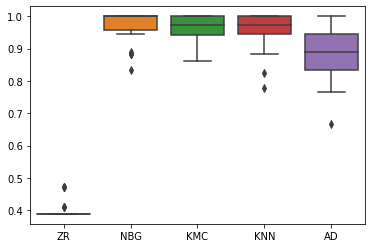

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

scores = []

scores.append(scores_zR)
scores.append(scores_gNB)
scores.append(scores_kMC)
scores.append(scores_kNN)
scores.append(scores_dT)


columns = ['ZR', 'NBG', 'KMC', 'KNN', 'AD']

df_scores = pd.DataFrame(data=np.transpose(scores), columns=columns)

sns.boxplot( data=df_scores )
plt.show()

In [ ]:
from scipy.stats import ttest_rel, wilcoxon

p_values = [[0 for i in range(5)] for j in range(5)]

for i, value in enumerate(['ZR', 'NBG', 'KMC', 'KNN', 'AD']):
  p_values[i][i] = value

for i in range(5):
  for j in range(5):
    if i != j:
      if j <= i:
        s, p = wilcoxon(scores[i], scores[j])
        p_values[i][j] = round(p, 3)
      else:
        s,p = ttest_rel(scores[i], scores[j])
        p_values[i][j] = round(p, 3)


df_p_values = pd.DataFrame(p_values)
df_p_values

,0,1,2,3,4
0,ZR,0.0,0.0,0.0,0.0
1,0.0,NBG,0.296,0.053,0.0
2,0.0,0.291,KMC,0.844,0.0
3,0.0,0.115,0.988,KNN,0.0
4,0.0,0.0,0.0,0.0,AD
